### The Libraries
<p>Lets invoke some libraries we may need - Sklearn for Machine Learning part, Numpy for vector transformations, Pandas for the final summary, and some for Image Processing - cv2, skimage, matplotlib.pyplot,....)<p>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.cluster import KMeans
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import cv2

In [4]:
plt.style.use('ggplot')
plt.rcParams['font.family'] = 'sans-serif' 
plt.rcParams['font.serif'] = 'Ubuntu' 
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 14
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.labelweight'] = 'bold' 
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['figure.titlesize'] = 12
plt.rcParams['image.cmap'] = 'jet' 
plt.rcParams['image.interpolation'] = 'none' 
plt.rcParams['figure.figsize'] = (10, 10)
plt.rcParams['axes.grid'] = False
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 8
colors = ['xkcd:pale orange', 'xkcd:sea blue', 'xkcd:pale red', 'xkcd:sage green', 'xkcd:terra cotta', 'xkcd:dull purple', 'xkcd:teal', 'xkcd: goldenrod', 'xkcd:cadet blue',
'xkcd:scarlet']

<h3>The Machine Learning part</h3>
<p>The main idea is to use the image as (N_rows X N_columns X N_channels) vector. Considering this vector, it is possible to apply the K Means algorithm and identify k clusters, which will be our colors.</p>

<h4>Convert RGB to Hex Conversion & Read Image in RGB color space</h4>

In [5]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

<h4>Get colors from an image</h4>

In [7]:
image = get_image('inputimage.jpg')
number_of_colors = 10
modified_image = image.reshape(image.shape[0]*image.shape[1], 3)
clf = KMeans(n_clusters = number_of_colors)
labels = clf.fit_predict(modified_image)

In [10]:
counts = Counter(labels)

center_colors = clf.cluster_centers_

# We got ordered colors by iterating through the keys
ordered_colors = [center_colors[i] for i in counts.keys()]
hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
rgb_colors = [ordered_colors[i] for i in counts.keys()]

([<matplotlib.patches.Wedge at 0x7fbba49435f8>,
 [Text(0.9508490938770238, 0.5530696164799175, '#9b8a78'),
  Text(0.20532004092644227, 1.0806681640512799, '#110d09'),
  Text(-0.5305285287416696, 0.9636075343163313, '#8a7968'),
  Text(-0.9964196382848673, 0.46599131369614005, '#26201a'),
  Text(-1.0994748727676964, -0.03398535202786204, '#bdad9d'),
  Text(-0.7688434667233432, -0.7866890895880224, '#776757'),
  Text(-0.15374068933754562, -1.0892032870139607, '#e8e3db'),
  Text(0.2699498236442976, -1.0663616144228059, '#ad9b8b'),
  Text(0.8623025286440865, -0.6829599908442766, '#5f4f3f'),
  Text(1.0843868945705335, -0.1846755611435224, '#41372d')])

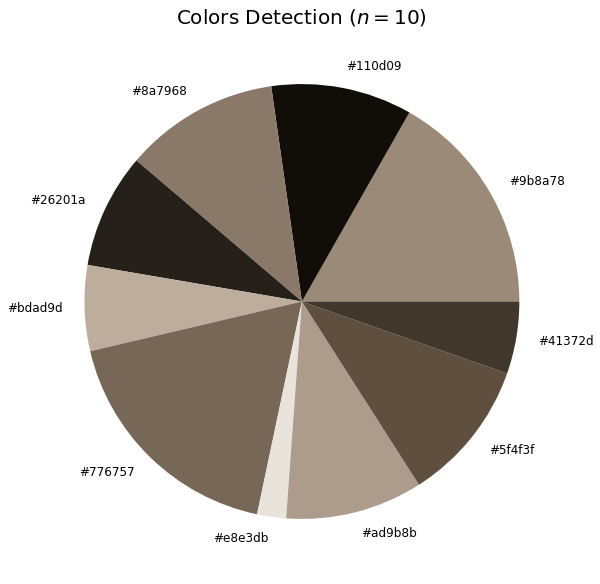

In [12]:
plt.title('Colors Detection ($n=10$)', fontsize=20)
plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)